In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2,os

data_path='/content/drive/MyDrive/dataset2'
data_path='/content/drive/MyDrive/MSDS/Face Mask Dataset/Test/WithMask'

categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1}
['without mask', 'with mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)


In [ ]:
np.save('data',data)
np.save('target',new_target)


In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [ ]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 79s 3s/step - loss: 0.7370 - accuracy: 0.5344 - val_loss: 0.6703 - val_accuracy: 0.6048
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 78s 3s/step - loss: 0.6233 - accuracy: 0.6503 - val_loss: 0.9490 - val_accuracy: 0.5000
Epoch 3/20
31/31 [==============================] - 77s 3s/step - loss: 0.4918 - accuracy: 0.7555 - val_loss: 0.3653 - val_accuracy: 0.8468
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 77s 2s/step - loss: 0.2258 - accuracy: 0.9243 - val_loss: 0.3838 - val_accuracy: 0.8226
Epoch 5/20
31/31 [==============================] - 77s 2s/step - loss: 0.2264 - accuracy: 0.9017 - val_loss: 0.3199 - val_accuracy: 0.8750
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/20
31/31 [==============================] - 77s 3s/step - loss: 0.1592 - accuracy: 0.9386 - val_loss: 0.3160 - val_acc

In [ ]:
history.history['loss']

[0.7083026766777039,
 0.5894929766654968,
 0.4030485451221466,
 0.24171628057956696,
 0.19083058834075928,
 0.15270204842090607,
 0.14017830789089203,
 0.0986340343952179,
 0.08290541172027588,
 0.06597231328487396,
 0.04928050562739372,
 0.04436536878347397,
 0.0455482043325901,
 0.036834727972745895,
 0.023408537730574608,
 0.028041204437613487,
 0.03753113001585007,
 0.03369015082716942,
 0.05701959505677223,
 0.016964439302682877]

In [ ]:
history.history['val_loss']

[0.6702963709831238,
 0.9490276575088501,
 0.3652646243572235,
 0.38380709290504456,
 0.31985047459602356,
 0.31597742438316345,
 0.2508326470851898,
 0.21970075368881226,
 0.19932779669761658,
 0.2765423059463501,
 0.21961501240730286,
 0.27294689416885376,
 0.21965989470481873,
 0.21215075254440308,
 0.23260168731212616,
 0.33454495668411255,
 0.276050865650177,
 0.23870298266410828,
 0.23112109303474426,
 0.28031522035598755]

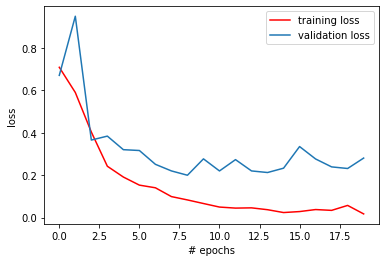

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
history.history['accuracy']

[0.5424242615699768,
 0.6838383674621582,
 0.8252525329589844,
 0.9141414165496826,
 0.9272727370262146,
 0.9484848380088806,
 0.9494949579238892,
 0.9727272987365723,
 0.9727272987365723,
 0.973737359046936,
 0.978787899017334,
 0.9848484992980957,
 0.9818181991577148,
 0.9888888597488403,
 0.9949495196342468,
 0.991919219493866,
 0.9888888597488403,
 0.986868679523468,
 0.9747474789619446,
 0.9949495196342468]

In [ ]:
history.history['val_accuracy']

[0.6048387289047241,
 0.5,
 0.8467742204666138,
 0.8225806355476379,
 0.875,
 0.8588709831237793,
 0.9032257795333862,
 0.9193548560142517,
 0.9314516186714172,
 0.9274193644523621,
 0.9274193644523621,
 0.9153226017951965,
 0.9435483813285828,
 0.9435483813285828,
 0.9314516186714172,
 0.9274193644523621,
 0.9314516186714172,
 0.9274193644523621,
 0.9435483813285828,
 0.9354838728904724]

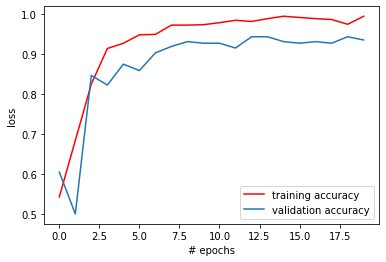

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 554ms/step - loss: 0.1480 - accuracy: 0.9493
[0.1479702889919281, 0.9492753744125366]
